## PCA - Principal Component Analysis-Unsupervised

### Import

In [58]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pyclustertend import hopkins
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# plt.style.use('classic')
sns.set_style("white") # https://www.codecademy.com/article/seaborn-design-i

### Data

In [59]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR) 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### EDA

In [60]:
X=pd.DataFrame(cancer.data, columns=cancer.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [61]:
X.shape

(569, 30)

In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [63]:
#Standartscale uygulamamız gerektiğine karar veriyoruz.

X.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [64]:
# 1=İyi huylu, 0=kötü huylu

pd.DataFrame(cancer.target).value_counts()

1    357
0    212
dtype: int64

In [65]:
# kötü huyluyu=1, iyi huyluyu=0 yapmak için

y = pd.Series(cancer.target).map({0:1, 1:0})
y.head()

0    1
1    1
2    1
3    1
4    1
dtype: int64

### PCA with sklearn

### Scaling

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
scaled_X = scaler.fit_transform(X)

<AxesSubplot:>

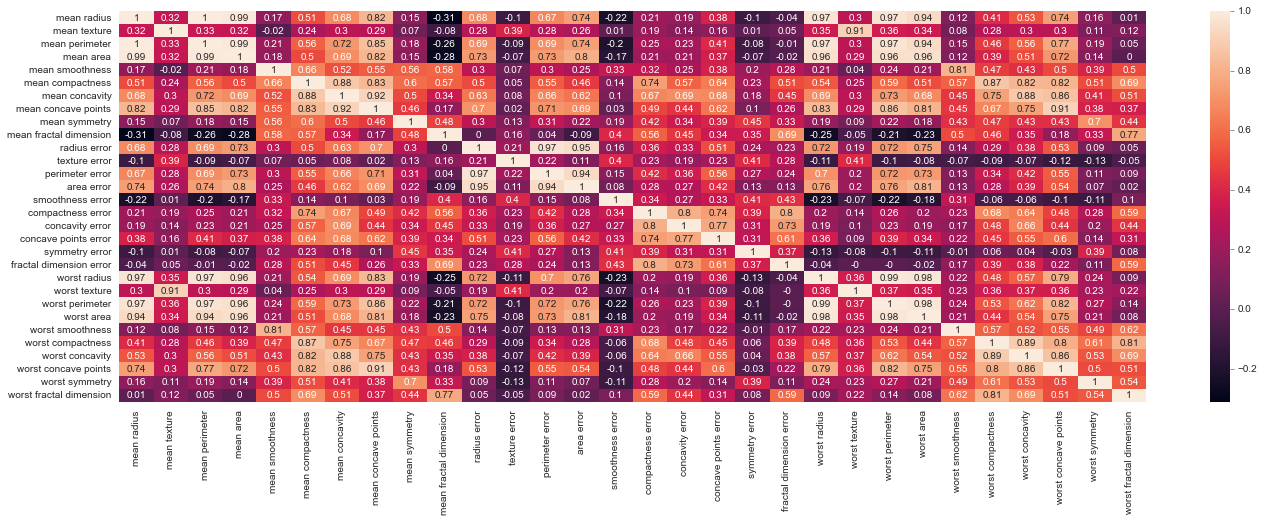

In [69]:
# Tablodan bakınca "r" ve buna bağlı featurelardan dolayı multicoliniarity var,
# PCA bunu bizim için hallediyor

df_scaled_X = pd.DataFrame(scaled_X, columns = X.columns)
plt.figure(figsize = (23, 7))
sns.heatmap(df_scaled_X.corr().round(2), annot = True)

### PCA

In [70]:
# lineer datalarda çok iyi sonuç veriyor.
# Unlineerlerde iyi sonuç vermiyor.
# Güçlü featurelar varsa o kadar çok iyi sonuç veriyor.

from sklearn.decomposition import PCA

In [71]:
# 2 component olsun istiyorum, None seçersen feature kadar component verir.

pca = PCA(n_components=2)

In [72]:
# Eigen values x feature kadar satırlık 2 adet component oluşturur.

principal_components = pca.fit_transform(scaled_X)

In [73]:
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [74]:
component_df = pd.DataFrame(data = principal_components,
                            columns = ["first_component", "second_component"])
component_df

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


### Eigenvalues & Eigenvectors

In [75]:
# Eigenvalues featureların o componente ne kadar katkı sağlayacağını gösterir.

pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [76]:
eigenvectors_first_component = pca.components_[0]
eigenvectors_first_component

array([0.21890244, 0.10372458, 0.22753729, 0.22099499, 0.14258969,
       0.23928535, 0.25840048, 0.26085376, 0.13816696, 0.06436335,
       0.20597878, 0.01742803, 0.21132592, 0.20286964, 0.01453145,
       0.17039345, 0.15358979, 0.1834174 , 0.04249842, 0.10256832,
       0.22799663, 0.10446933, 0.23663968, 0.22487053, 0.12795256,
       0.21009588, 0.22876753, 0.25088597, 0.12290456, 0.13178394])

In [77]:
# "+" değerler fetureın component ile pozitif yönde korele olduğunu gösterir.
# Her değer 0-1 arasında bir değerdir ve feature katkı oranını gösterir.
# Bir komponentde az katkısı olan diğerinde az katkısı olur, her komponenetde her feature katkı sağlar.
# Birinde biriken featurelar kansere sebep olanlar iken diğerinde olmayanlar oluyor diyebiliriz.

pd.DataFrame(eigenvectors_first_component,
             index=X.columns,
             columns=["first_eigenvectors"]).sort_values("first_eigenvectors", ascending=False)

,first_eigenvectors
mean concave points,0.260854
mean concavity,0.258400
worst concave points,0.250886
mean compactness,0.239285
worst perimeter,0.236640
worst concavity,0.228768
worst radius,0.227997
mean perimeter,0.227537
worst area,0.224871
mean area,0.220995


In [78]:
eigenvectors_second_component = pca.components_[1]
eigenvectors_second_component

array([-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
        0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
       -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
        0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
       -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
        0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947])

In [79]:
# "-" değerler fetureın component ile negatif yönde korele olduğunu gösterir.

pd.DataFrame(eigenvectors_second_component,
             index=X.columns,
             columns=["second_eigenvectors"]).sort_values("second_eigenvectors", ascending=False)

,second_eigenvectors
mean fractal dimension,0.366575
fractal dimension error,0.280092
worst fractal dimension,0.275339
compactness error,0.232716
smoothness error,0.204430
concavity error,0.197207
mean symmetry,0.190349
mean smoothness,0.186113
symmetry error,0.183848
worst smoothness,0.172304


In [80]:
df_scaled_X.loc[0]

mean radius                1.097064
mean texture              -2.073335
mean perimeter             1.269934
mean area                  0.984375
mean smoothness            1.568466
mean compactness           3.283515
mean concavity             2.652874
mean concave points        2.532475
mean symmetry              2.217515
mean fractal dimension     2.255747
radius error               2.489734
texture error             -0.565265
perimeter error            2.833031
area error                 2.487578
smoothness error          -0.214002
compactness error          1.316862
concavity error            0.724026
concave points error       0.660820
symmetry error             1.148757
fractal dimension error    0.907083
worst radius               1.886690
worst texture             -1.359293
worst perimeter            2.303601
worst area                 2.001237
worst smoothness           1.307686
worst compactness          2.616665
worst concavity            2.109526
worst concave points       2

In [81]:
(df_scaled_X.loc[0] * eigenvectors_first_component).sum()

9.192836826213254

In [82]:
(df_scaled_X.loc[0] * eigenvectors_second_component).sum()

1.9485830707776817

In [83]:
component_df.head()

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [84]:
# data ile ilgili ne kadar çok bilgi barındırıyorsa Eigen value o kadar büyük olur.
# Eigenvalues
pca.explained_variance_

array([13.30499079,  5.7013746 ])

### Corr between components

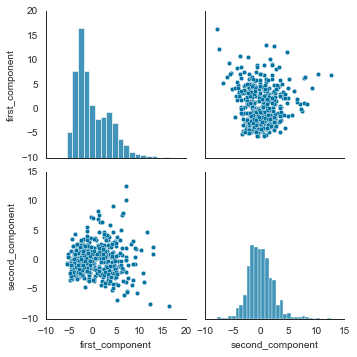

In [85]:
sns.pairplot(component_df)

In [86]:
component_df.corr().round()

,first_component,second_component
first_component,1.0,0.0
second_component,0.0,1.0


### Finding optimal number of components

In [87]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [88]:
pca.explained_variance_ratio_.cumsum()

array([0.44272026, 0.63243208])

Text(0, 0.5, 'Variance Ratio')

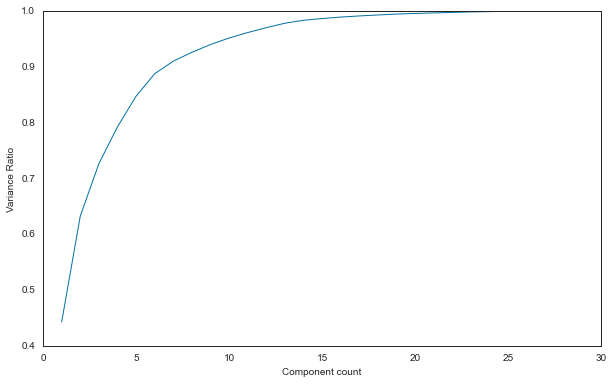

In [89]:
pca = PCA().fit(scaled_X)
x = range(1,31)

plt.plot(x, np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Component count")
plt.ylabel("Variance Ratio")

In [90]:
pca = PCA(n_components=30).fit(scaled_X)

In [91]:
my_dict = {"explained_variance":pca.explained_variance_, 
           "explained_variance_ratio":pca.explained_variance_ratio_,
           "cumsum_explained_variance_ratio":pca.explained_variance_ratio_.cumsum()}

In [92]:
df_ev = pd.DataFrame(my_dict, index = range(1,31))
df_ev

,explained_variance,explained_variance_ratio,cumsum_explained_variance_ratio
1,13.304991,0.442720,0.442720
2,5.701375,0.189712,0.632432
3,2.822910,0.093932,0.726364
4,1.984128,0.066021,0.792385
5,1.651633,0.054958,0.847343
6,1.209482,0.040245,0.887588
7,0.676409,0.022507,0.910095
8,0.477456,0.015887,0.925983
9,0.417629,0.013896,0.939879
10,0.351311,0.011690,0.951569


<AxesSubplot:ylabel='explained_variance_ratio'>

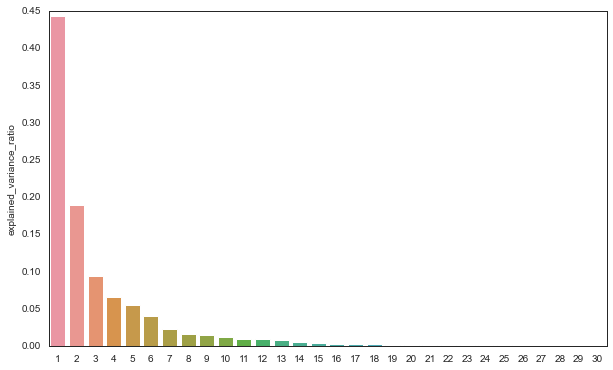

In [93]:
sns.barplot(x = df_ev.index, y= df_ev.explained_variance_ratio)

In [94]:
pca = PCA(n_components=2)

In [95]:
principal_components = pca.fit_transform(scaled_X)
principal_components

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [96]:
component_df = pd.DataFrame(data = principal_components,
                            columns = ["first_component", "second_component"])
component_df

,first_component,second_component
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072
...,...,...
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010


### K-Means Algorithm

In [97]:
from pyclustertend import hopkins

In [98]:
hopkins(component_df, component_df.shape[0])

0.13884957185257105

In [99]:
from sklearn.cluster import KMeans

ssd = []
K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(component_df)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

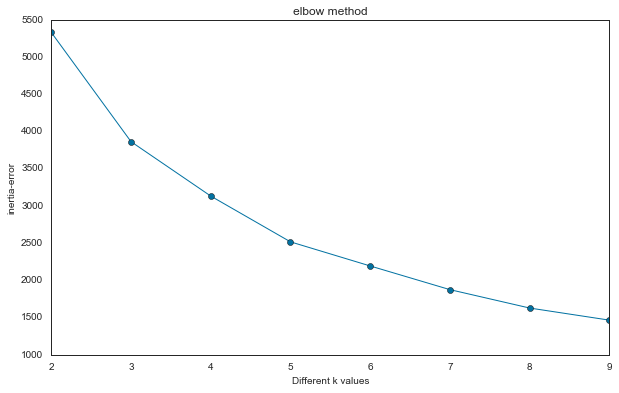

In [100]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [101]:
ssd

[5332.555574203041,
 3864.545284003256,
 3133.6178606909616,
 2518.1650120045506,
 2194.080780717013,
 1875.92623706678,
 1628.6595343172794,
 1465.9534175407107]

In [102]:
pd.Series(ssd).diff()

0            NaN
1   -1468.010290
2    -730.927423
3    -615.452849
4    -324.084231
5    -318.154544
6    -247.266703
7    -162.706117
dtype: float64

In [103]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,1468.010290
3,730.927423
4,615.452849
5,324.084231
6,318.154544
7,247.266703
8,162.706117


<AxesSubplot:>

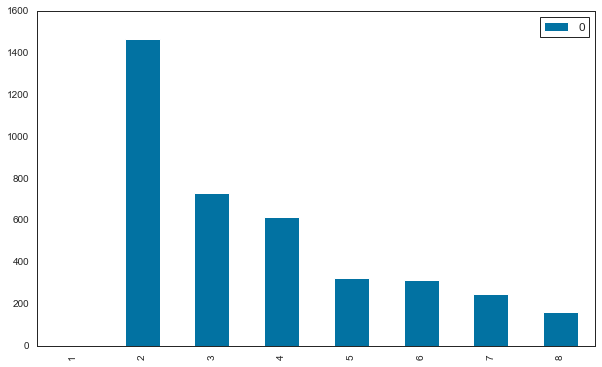

In [104]:
df_diff.plot(kind='bar')

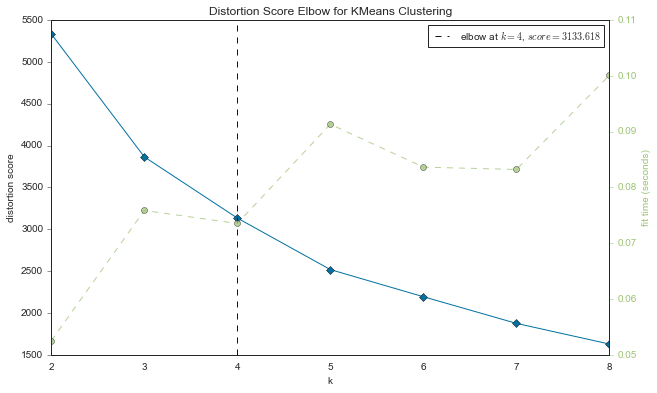

In [105]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(component_df)        # Fit the data to the visualizer
visualizer.show();

In [106]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2,9)

for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(component_df)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(component_df, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.5084690190670874
For n_clusters=3, the silhouette score is 0.4766724460743121
For n_clusters=4, the silhouette score is 0.46560184830658147
For n_clusters=5, the silhouette score is 0.36344947291715024
For n_clusters=6, the silhouette score is 0.3572064605729735
For n_clusters=7, the silhouette score is 0.36612124050275385
For n_clusters=8, the silhouette score is 0.3726397252192846


In [107]:
model = KMeans(n_clusters =2, random_state=42)
labels = model.fit_predict(component_df)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [108]:
ct = pd.crosstab(y, labels)
ct

col_0,0,1
row_0,,
0,341,16
1,37,175


### Interpreting PCA results

In [109]:
scaled_df = pd.DataFrame(scaled_X, columns=X.columns)
scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [110]:
combined_df = pd.concat([component_df, scaled_df], axis =1)
correlation = combined_df.corr()
correlation.head()

,first_component,second_component,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
first_component,1.000000e+00,4.578202e-17,0.797767,0.378013,0.829236,0.805393,0.519653,0.872050,0.941713,0.950654,...,0.830910,0.380727,0.862408,0.819517,0.466310,0.765672,0.833719,0.914327,0.447913,0.480273
second_component,4.578202e-17,1.000000e+00,-0.557903,-0.142438,-0.513349,-0.551270,0.444002,0.362361,0.143534,-0.082943,...,-0.524526,-0.108469,-0.476841,-0.523298,0.411059,0.342564,0.233709,-0.019699,0.338485,0.656865
mean radius,7.977668e-01,-5.579027e-01,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,3.780132e-01,-1.424382e-01,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,8.292355e-01,-5.133487e-01,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019


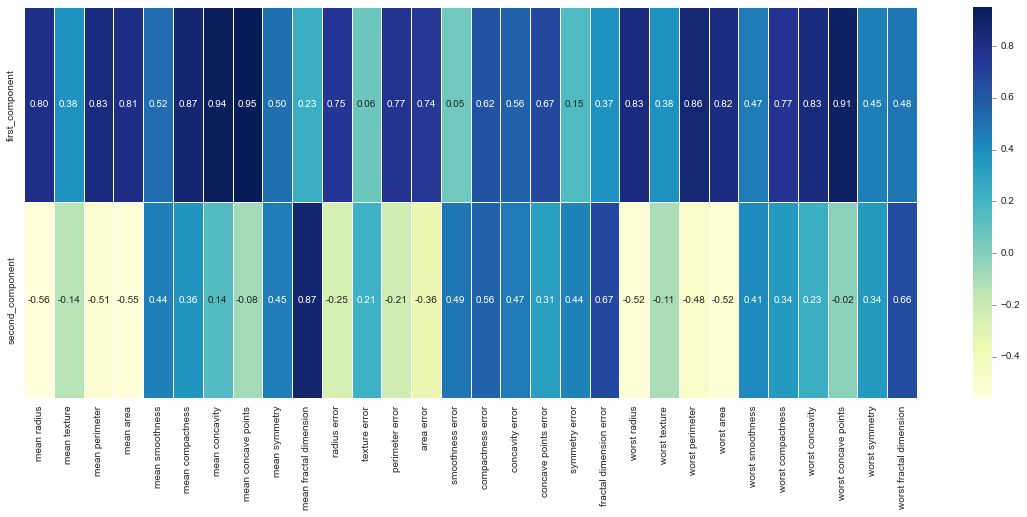

In [111]:
fig, ax = plt.subplots(figsize=(20, 7))
sns.heatmap(correlation.iloc[:2,2:], cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

<AxesSubplot:>

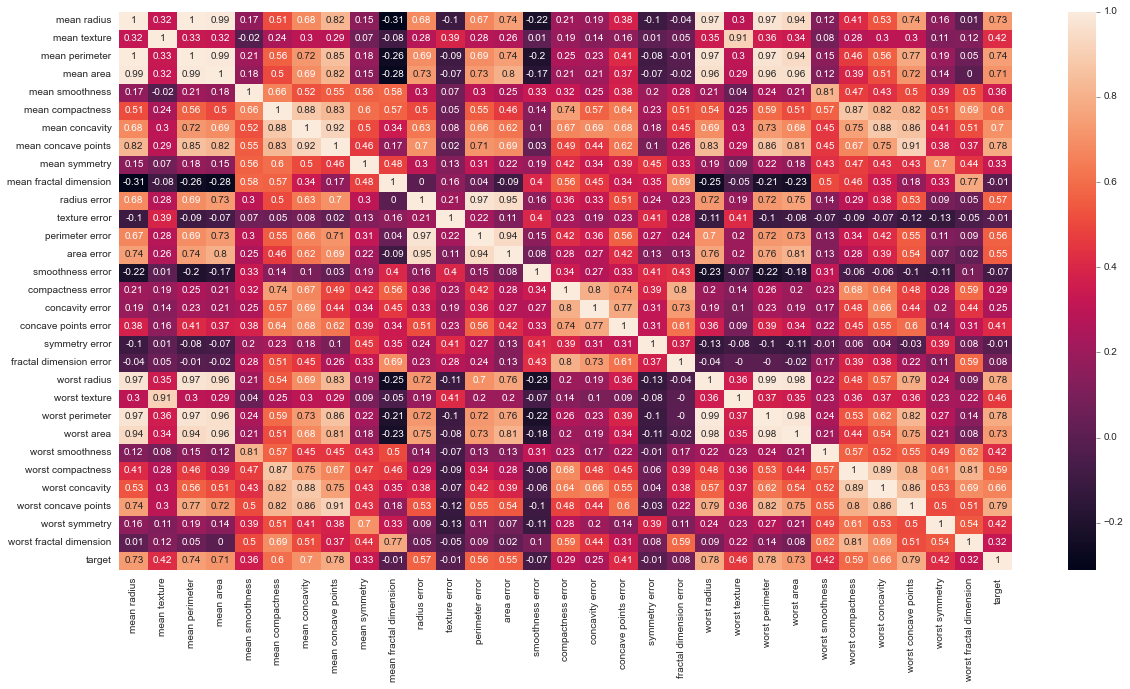

In [112]:
df_new = pd.concat([X, y], axis=1).rename(columns={0:"target"})
df_new
plt.figure(figsize = (20, 10))
sns.heatmap(df_new.corr().round(2), annot = True)

<AxesSubplot:xlabel='first_component', ylabel='second_component'>

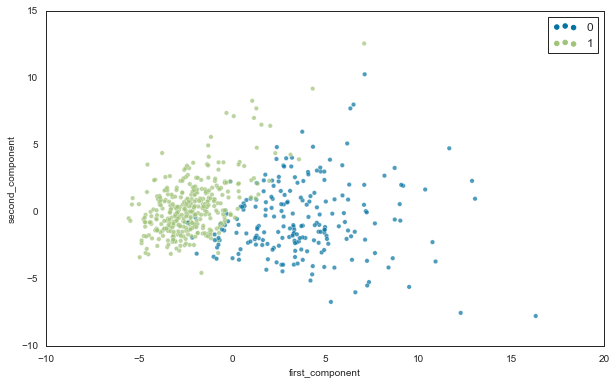

In [113]:
sns.scatterplot(x = component_df.first_component,
                y= component_df.second_component,
                hue=cancer.target,
                alpha=0.7)

Text(0.5, 1.0, 'K_means')

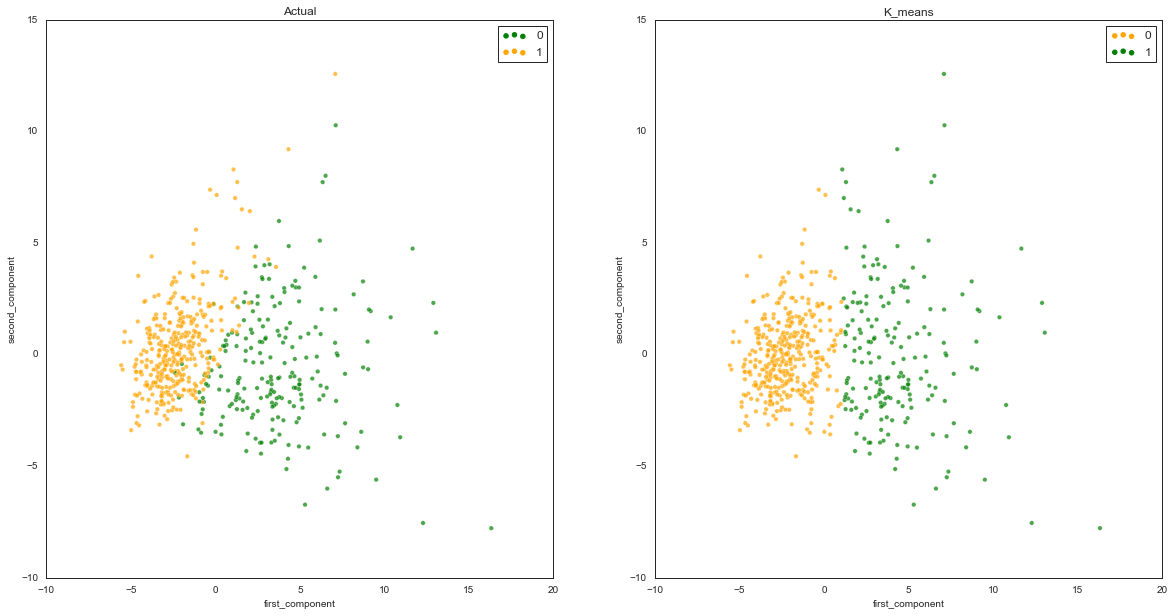

In [114]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x = component_df.first_component,
                y= component_df.second_component,
                hue=cancer.target,
                alpha=0.7,
                palette=['green','orange'])
plt.title("Actual")

plt.subplot(122)
sns.scatterplot(x = component_df.first_component,
                y= component_df.second_component,
                hue=labels,
                alpha=0.7,
                palette=['orange','green'])
plt.title("K_means")